    Problem statement:


    Identifying the Country with the Highest Renewable Energy Production:
    Determine the country that has consistently exhibited the highest electricity or energy production from renewable sources over the years.

    Analyzing the Proportion of Renewable Energy in Each Country Over Time:
    Examine the proportion or percentage of renewable energy within the total energy production for each country across multiple years.

    Determining the Most Produced/Consumed Renewable Energy Source by Year and country:
    Identify the renewable energy source (e.g., solar, wind, hydro, etc.) that has consistently shown the highest production or consumption levels on a yearly basis.

Renewable energy time serise analysis
1. importing the data to a variable df

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

df_01 = pd.read_csv(r"archive\01.csv")
df_02 = pd.read_csv(r"archive\02.csv")
df_03 = pd.read_csv(r"archive\03.csv")
df_04 = pd.read_csv(r"archive\04.csv")
df_05 = pd.read_csv(r"archive\05.csv")
df_06 = pd.read_csv(r"archive\06.csv")
df_07 = pd.read_csv(r"archive\07.csv")
df_08 = pd.read_csv(r"archive\08.csv")
df_09 = pd.read_csv(r"archive\09.csv")
df_10 = pd.read_csv(r"archive\10.csv")
df_11 = pd.read_csv(r"archive\11.csv")
df_12 = pd.read_csv(r"archive\12.csv")
df_13 = pd.read_csv(r"archive\13.csv")
df_14 = pd.read_csv(r"archive\14.csv")
df_15 = pd.read_csv(r"archive\15.csv")
df_16 = pd.read_csv(r"archive\16.csv")
df_17 = pd.read_csv(r"archive\17.csv")

df_list = [df_01,df_02,df_03,df_04,df_05,df_06,df_07,df_08,df_09,df_10,df_11,df_12,df_13,df_14,df_15,df_16,df_17]


droping code column as its usless for our problem statement.

In [97]:
for df in df_list:
    df.drop(['Code'], axis=1, inplace=True)

    checking for duplicate values.

In [98]:
print(df_01['Entity'].unique())

['Africa' 'Africa (BP)' 'Algeria' 'Argentina' 'Asia' 'Asia Pacific (BP)'
 'Australia' 'Austria' 'Azerbaijan' 'Bangladesh' 'Belarus' 'Belgium'
 'Brazil' 'Bulgaria' 'CIS (BP)' 'Canada' 'Central America (BP)' 'Chile'
 'China' 'Colombia' 'Croatia' 'Cyprus' 'Czechia' 'Denmark'
 'Eastern Africa (BP)' 'Ecuador' 'Egypt' 'Estonia' 'Europe' 'Europe (BP)'
 'European Union (27)' 'Finland' 'France' 'Germany' 'Greece'
 'High-income countries' 'Hong Kong' 'Hungary' 'Iceland' 'India'
 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Japan' 'Kazakhstan'
 'Kuwait' 'Latvia' 'Lithuania' 'Lower-middle-income countries'
 'Luxembourg' 'Malaysia' 'Mexico' 'Middle Africa (BP)' 'Middle East (BP)'
 'Morocco' 'Netherlands' 'New Zealand' 'Non-OECD (BP)' 'North America'
 'North America (BP)' 'North Macedonia' 'Norway' 'OECD (BP)' 'Oceania'
 'Oman' 'Pakistan' 'Peru' 'Philippines' 'Poland' 'Portugal' 'Qatar'
 'Romania' 'Russia' 'Saudi Arabia' 'Singapore' 'Slovakia' 'Slovenia'
 'South Africa' 'South America' 'Sou

    here are multiple repetition of africa in ['Africa (BP)' 'Eastern Africa (BP)' 'Middle Africa (BP)' 'South Africa' 'Western Africa (BP)']
    where 'Africa (BP)' has the exact same value as 'Africa'.
    some have (Ember), (27) or both at end.
    some data is like asia and asia-pasafic which overlaps the data.
    thus cleaning this such that tere is no overlap and the name is pure.

makeing a function for cleaning the values of 'entity' column.

In [99]:
def get_unique_col(df):
    unique_col = []
    waste_catecter = ['(BP)','(27)','(Ember)']
    unique_val = ''
    for i, val in enumerate(df['Entity'].unique()):
        for j in val.split():
            if j in unique_col:
                unique_val = ''
                break
            if j not in waste_catecter:
                unique_val += j
        if unique_val:
            unique_col.append(unique_val)
        unique_val = ''

    return unique_col

def clean_entity(df):
    unique_col = get_unique_col(df)
    drop_index = []
    df_dummy = df
    waste_carecters = ['(BP)','(27)','(Ember)']

    for i, val in enumerate(df_dummy['Entity']):
        val_new = val
        for waste_carecter in waste_carecters:
            val_new = val_new.replace(waste_carecter, '')
        if val_new not in unique_col:
            drop_index.append(i)
        if val != val_new:
            df_dummy.loc[df_dummy.index[i], 'Entity'] = val_new

    df_dummy = df_dummy.drop(drop_index)
    return df_dummy

for df in df_list:
    df = clean_entity(df)
    df.reset_index(drop=True)


making a function for combining dataframes.

In [100]:
def combine_df(df_list):
    data_list = df_list.copy()
    data_comb = pd.merge(left = data_list[0],right=data_list[1], on=['Year','Entity'], how='inner')
    for i in range(len(df_list)-2):
        data_comb = data_comb.merge(data_list[i+2], on=['Year','Entity'], how='inner')

    return data_comb

creating function for cleaning year and entity.

In [101]:
def drop_null_entity(df, slice_entity_tuple):
    contries = list(df['Entity'].value_counts().index[slice_entity_tuple[0]:slice_entity_tuple[1]])
    df_dummy = df.copy()

    for i, val in enumerate(df_dummy['Entity']):
        if val not in contries:
            df_dummy = df_dummy.drop(i)
    return df_dummy

def drop_null_year(df, slice_year_tuple):
    year_list = list(df['Year'].value_counts().index)
    year_list.sort()
    year_list = year_list[slice_year_tuple[0]:slice_year_tuple[1]]
    df_dummy = df.copy()
    drop_index = []

    for i,val in enumerate(df_dummy['Year']):
        if val not in year_list:
            drop_index.append(i)
    df_dummy = df_dummy.drop(drop_index,axis = 0)
    return df_dummy

combining datagames requiered the problem statement.

In [102]:
df_share_renewable = combine_df([df_01,df_04])
df_mordern_renewable = combine_df([df_02,df_03])
df_indivijual_energy_electricity = combine_df([df_06,df_07,df_10,df_11,df_14,df_15])

changing column name.

In [103]:
df_share_renewable.rename(columns={'Renewables (% equivalent primary energy)': '% primary energy','Renewables (% electricity)':'% electricity'}, inplace=True)
df_mordern_renewable.rename(columns={'Geo Biomass Other - TWh': 'Geo and Biomass Energy(TWh)','Solar Generation - TWh':'Solar Energy(TWh)','Wind Generation - TWh':'Wind Energy(TWh)',
                                     'Hydro Generation - TWh':'Hydro Energy(TWh)','Electricity from wind (TWh)':'Wind Electricity(TWh)','Electricity from hydro (TWh)':'Hydro Electricity(TWh)',
                                     'Electricity from solar (TWh)':'Solar Electricity(TWh)','Other renewables including bioenergy (TWh)':'Other Energy(TWh)'}, inplace=True)
df_indivijual_energy_electricity.rename(columns={'Solar (% equivalent primary energy)': 'Solar Energy(%)','Solar (% electricity)':'Solar Electricity(%)',
                                                 'Wind (% electricity)':'Wind Electricity(%)','Wind (% equivalent primary energy)':'Wind Energy(%)',
                                                 'Hydro (% electricity)':'Hydro Electricity(%)','Hydro (% equivalent primary energy)':'Hydro Energy(%)'}, inplace=True)

checking for outliers.

as the data dosnt contain proper seosonality, this step redundent.

creating a maping dict for contries to agregate them

In [104]:
major_region_mapping = {
    'Africa': ['Africa', 'Africa ', 'Algeria', 'Eastern Africa ', 'Egypt', 'Morocco', 'Middle Africa ', 'Western Africa '],
    'Asia': ['Asia', 'Asia Pacific ', 'Bangladesh', 'China', 'Hong Kong', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Kazakhstan', 'Kuwait', 'Malaysia', 'Pakistan', 'Philippines', 'Qatar', 'Saudi Arabia', 'Singapore', 'South Korea', 'Taiwan', 'Thailand', 'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Vietnam'],
    'Europe': ['Austria', 'Azerbaijan', 'Belarus', 'Belgium', 'Bulgaria', 'CIS ', 'Czechia', 'Denmark', 'Estonia', 'Europe', 'Europe ', 'European Union ', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom'],
    'North America': ['Canada', 'Central America ', 'North America ', 'United States'],
    'Oceania': ['Australia', 'New Zealand'],
    'South America': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Peru', 'Trinidad and Tobago', 'Venezuela'],
    }
income_region_mapping = {
    'High': ['High-income countries', 'Hong Kong', 'Iceland', 'Ireland', 'Luxembourg', 'Macau', 'Monaco', 'Qatar', 'Singapore', 'Switzerland'],
    'Upper Middle': ['Austria', 'Belgium', 'Canada', 'Cyprus', 'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Israel', 'Italy', 'Japan', 'Netherlands', 'New Zealand', 'Norway', 'Portugal', 'Slovenia', 'South Korea', 'Spain', 'Sweden', 'United Kingdom', 'United States'],
    'Lower Middle': ['Argentina', 'Brazil', 'Chile', 'China', 'Colombia', 'Czech Republic', 'Estonia', 'Hungary', 'Latvia', 'Lithuania', 'Malaysia', 'Mexico', 'Peru', 'Poland', 'Romania', 'Russia', 'Saudi Arabia', 'Slovakia', 'South Africa', 'Thailand', 'Turkey', 'Ukraine', 'Venezuela'],
    'Low': ['Africa', 'Algeria', 'Australia', 'Azerbaijan', 'Bangladesh', 'Belarus', 'Bulgaria', 'CIS', 'Central America', 'Eastern Africa', 'Ecuador', 'Egypt', 'Europe', 'European Union', 'Indonesia', 'Iran', 'Iraq', 'Kazakhstan', 'Kuwait', 'Morocco', 'Nigeria', 'North America', 'North Macedonia', 'OECD', 'Oceania', 'Pakistan', 'Philippines', 'Taiwan', 'Trinidad and Tobago', 'Turkmenistan', 'USSR', 'United Arab Emirates', 'Upper-middle-income countries', 'Vietnam', 'Western Africa', 'World']
}

**EDA**

1) Identifying the Country with the Highest Renewable Energy Production

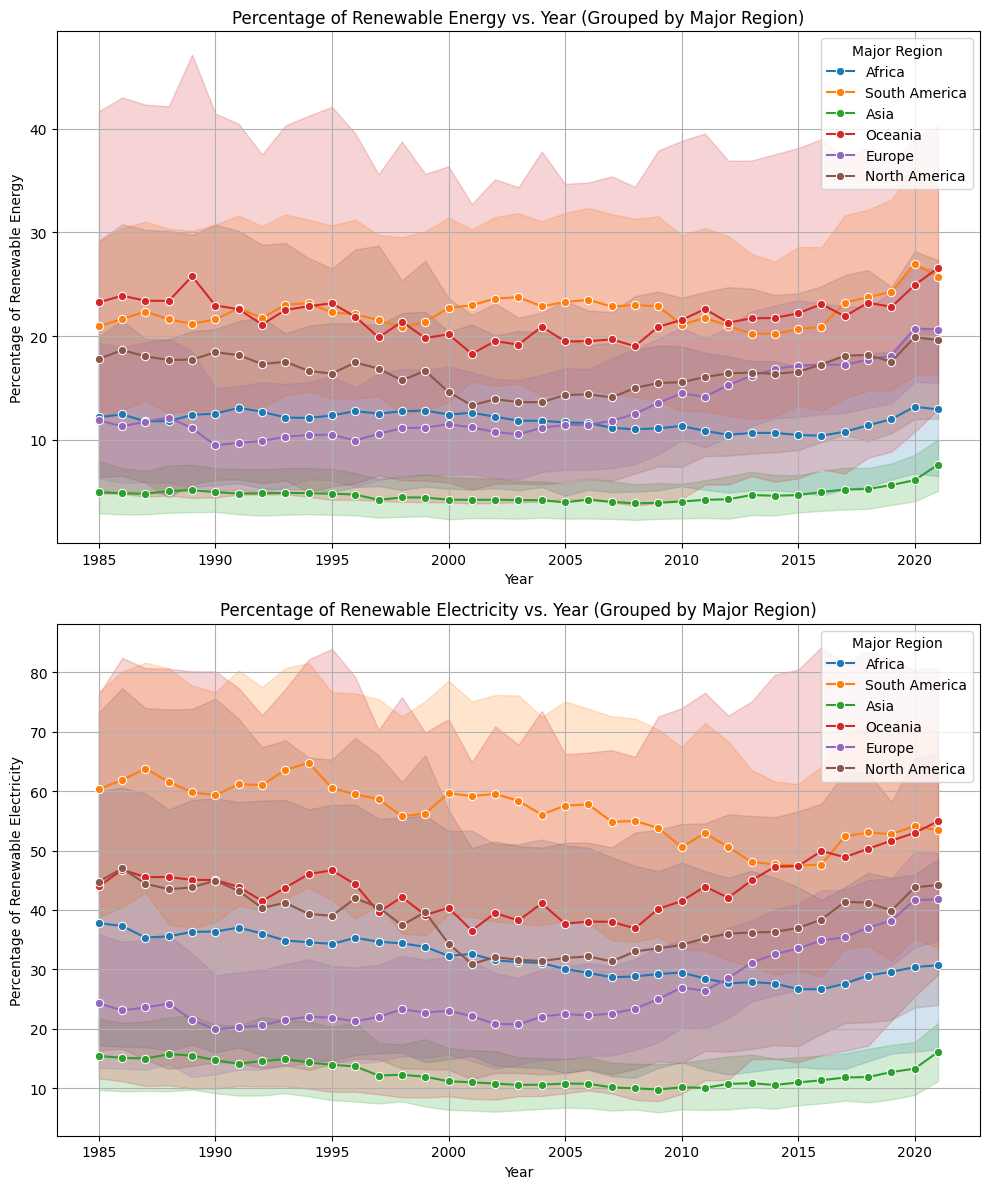

In [105]:
dummy_df_energy = df_share_renewable.copy()
dummy_df_energy['Major_Region'] = df_share_renewable['Entity'].apply(lambda x: [k for k, v in major_region_mapping.items() if x in v][0] if any(x in v for v in major_region_mapping.values()) else 'Unknown')
dummy_df_energy = dummy_df_energy[dummy_df_energy['Major_Region'] != 'Unknown']
dummy_df_energy.drop(columns=['Entity'], inplace=True)
dummy_df_energy = dummy_df_energy[['Major_Region'] + [col for col in dummy_df_energy if col != 'Major_Region']]

# Prepare data for the second plot
dummy_df_electricity = df_share_renewable.copy()
dummy_df_electricity['Major_Region'] = df_share_renewable['Entity'].apply(lambda x: [k for k, v in major_region_mapping.items() if x in v][0] if any(x in v for v in major_region_mapping.values()) else 'Unknown')
dummy_df_electricity = dummy_df_electricity[dummy_df_electricity['Major_Region'] != 'Unknown']
dummy_df_electricity.drop(columns=['Entity'], inplace=True)
dummy_df_electricity = dummy_df_electricity[['Major_Region'] + [col for col in dummy_df_electricity if col != 'Major_Region']]

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# Plot for Percentage of Renewable Energy vs. Year
sns.lineplot(data=dummy_df_energy, x='Year', y='% primary energy', hue='Major_Region', marker='o', ax=axes[0])
axes[0].set_title('Percentage of Renewable Energy vs. Year (Grouped by Major Region)')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Percentage of Renewable Energy')
axes[0].legend(title='Major Region')
axes[0].grid(True)

# Plot for Percentage of Renewable Electricity vs. Year
sns.lineplot(data=dummy_df_electricity, x='Year', y='% electricity', hue='Major_Region', marker='o', ax=axes[1])
axes[1].set_title('Percentage of Renewable Electricity vs. Year (Grouped by Major Region)')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Percentage of Renewable Electricity')
axes[1].legend(title='Major Region')
axes[1].grid(True)

plt.tight_layout()
plt.show()

    thw first graph shows the transition of % renewable energy over years for these 6 regions.
    we can see that europe and asia has remained consistent with the energy production over time, 
    while the rest of the rejions have improved frpm 2010 onwards.

Europe is the contry with highest rewnable energy production.

    the second graph shows the transition of % renewable electricity over years for these 6 regions.
    we can see that asia, north america and africa and norway has remained consistent with the energy production over time, 
    while europe and oceania have increased there relience on renewable electricity.

Europe is the contry with highest rewnable energy production.

2) Analyzing the Proportion of Renewable Energy in Each Country Over Time:

<Figure size 640x480 with 0 Axes>

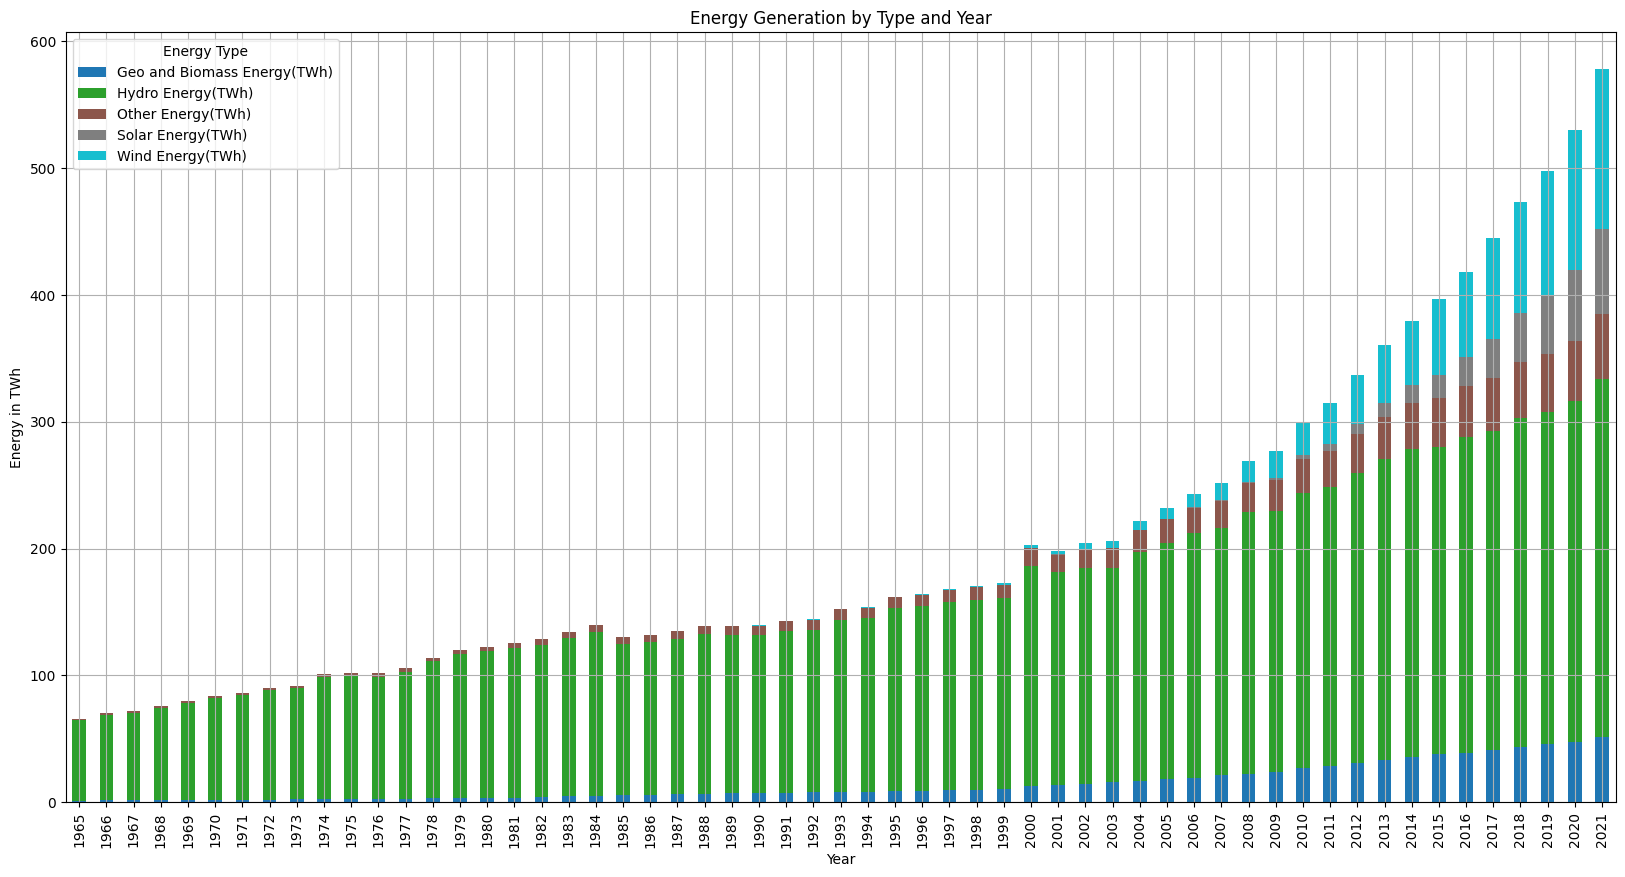

In [106]:
duummy_df = df_mordern_renewable[['Entity', 'Year','Geo and Biomass Energy(TWh)', 'Solar Energy(TWh)', 'Wind Energy(TWh)', 
                                  'Hydro Energy(TWh)', 'Other Energy(TWh)']]
melted_df = pd.melt(duummy_df, id_vars=['Entity', 'Year'], var_name='Type', value_name='TWh')
melted_df = melted_df.drop(columns=['Entity'])
pivot_df = melted_df.pivot_table(index='Year', columns='Type', values='TWh', fill_value=0)

plt.figure()  
pivot_df.plot(kind='bar', stacked=True, cmap='tab10') 
plt.title('Energy Generation by Type and Year')
plt.xlabel('Year')
plt.ylabel('Energy in TWh')
plt.legend(title='Energy Type')
plt.grid(True)
fig = plt.gcf()
fig.set_size_inches(20, 10)

plt.show()

    this graph shows that during 1965 the primary source of energy was hydro, 
    geo is evolving slowly from 1980
    whilethere was a rapid improvement in wind  from 2000, solar from 2010.
**conclusion**: 

    wind energy is the most promising and evolving renewable energy as per 2021.
    hydro energy has remained the highest sourse of renewable energy.

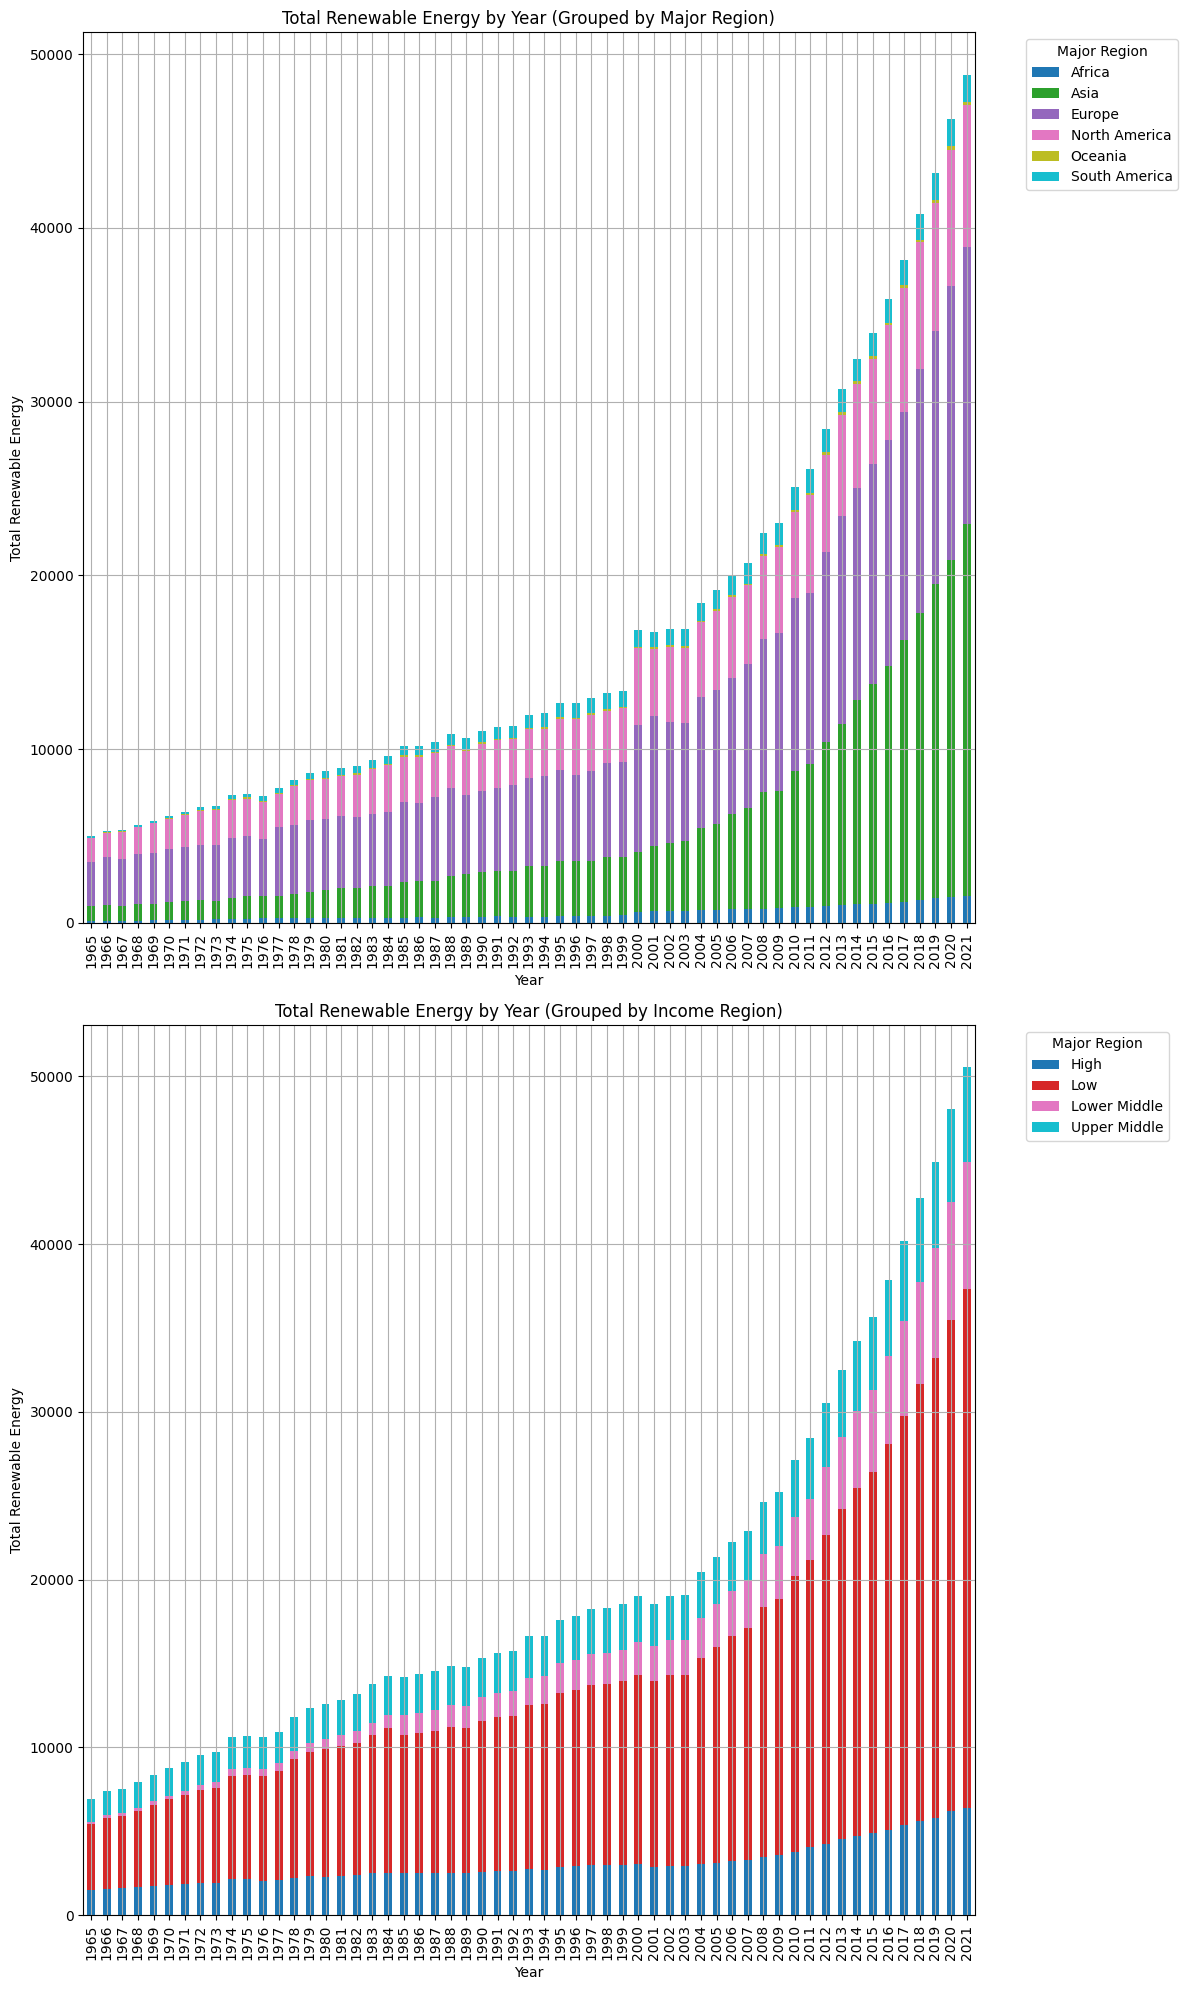

In [107]:
dummy_df_major_region = df_mordern_renewable[['Entity', 'Year', 'Geo and Biomass Energy(TWh)', 'Solar Energy(TWh)', 'Wind Energy(TWh)', 
                                  'Hydro Energy(TWh)', 'Wind Electricity(TWh)', 'Hydro Electricity(TWh)', 'Solar Electricity(TWh)', 'Other Energy(TWh)']].copy()
dummy_df_major_region['total_renewable_energy'] = dummy_df_major_region[['Geo and Biomass Energy(TWh)', 'Solar Energy(TWh)', 'Wind Energy(TWh)', 
                                  'Hydro Energy(TWh)', 'Wind Electricity(TWh)', 'Hydro Electricity(TWh)', 'Solar Electricity(TWh)', 'Other Energy(TWh)']].sum(axis=1)
dummy_df_major_region = dummy_df_major_region.drop(columns=['Geo and Biomass Energy(TWh)', 'Solar Energy(TWh)', 'Wind Energy(TWh)', 
                                  'Hydro Energy(TWh)', 'Wind Electricity(TWh)', 'Hydro Electricity(TWh)', 'Solar Electricity(TWh)', 'Other Energy(TWh)'])
dummy_df_major_region['Major_Region'] = dummy_df_major_region['Entity'].apply(lambda x: [k for k, v in major_region_mapping.items() if x in v][0] if any(x in v for v in major_region_mapping.values()) else 'Unknown')
dummy_df_major_region = dummy_df_major_region[dummy_df_major_region['Major_Region'] != 'Unknown']
dummy_df_major_region.drop(columns='Entity', inplace=True)
major_region_df = dummy_df_major_region.groupby(['Year', 'Major_Region'])['total_renewable_energy'].sum().reset_index()
pivot_df_major_region = major_region_df.pivot(index='Year', columns='Major_Region', values='total_renewable_energy')

# Prepare data for the second plot
dummy_df_income = df_mordern_renewable[['Entity', 'Year', 'Geo and Biomass Energy(TWh)', 'Solar Energy(TWh)', 'Wind Energy(TWh)', 
                                  'Hydro Energy(TWh)', 'Wind Electricity(TWh)', 'Hydro Electricity(TWh)', 'Solar Electricity(TWh)', 'Other Energy(TWh)']].copy()
dummy_df_income['total_renewable_energy'] = dummy_df_income[['Geo and Biomass Energy(TWh)', 'Solar Energy(TWh)', 'Wind Energy(TWh)', 
                                  'Hydro Energy(TWh)', 'Wind Electricity(TWh)', 'Hydro Electricity(TWh)', 'Solar Electricity(TWh)', 'Other Energy(TWh)']].sum(axis=1)
dummy_df_income = dummy_df_income.drop(columns=['Geo and Biomass Energy(TWh)', 'Solar Energy(TWh)', 'Wind Energy(TWh)', 
                                  'Hydro Energy(TWh)', 'Wind Electricity(TWh)', 'Hydro Electricity(TWh)', 'Solar Electricity(TWh)', 'Other Energy(TWh)'])
dummy_df_income['Major_Region'] = dummy_df_income['Entity'].apply(lambda x: next((k for k, v in income_region_mapping.items() if x in v), None))
dummy_df_income = dummy_df_income.dropna(subset=['Major_Region'])
dummy_df_income.drop(columns='Entity', inplace=True)
income_df = dummy_df_income.groupby(['Year', 'Major_Region'])['total_renewable_energy'].sum().reset_index()
pivot_df_income = income_df.pivot(index='Year', columns='Major_Region', values='total_renewable_energy')

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 20))

# Plot for Total Renewable Energy by Year (Grouped by Major Region)
pivot_df_major_region.plot(kind='bar', stacked=True, cmap='tab10', ax=axes[0])

# Set the title and labels for the first plot
axes[0].set_title('Total Renewable Energy by Year (Grouped by Major Region)')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Total Renewable Energy')
axes[0].legend(title='Major Region', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0].grid(True)

# Plot for Total Renewable Energy by Year (Grouped by Income Region)
pivot_df_income.plot(kind='bar', stacked=True, cmap='tab10', ax=axes[1])

# Set the title and labels for the second plot
axes[1].set_title('Total Renewable Energy by Year (Grouped by Income Region)')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Total Renewable Energy')
axes[1].legend(title='Major Region', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].grid(True)

plt.tight_layout()
plt.show()

    in first graph from 2010 there is significant growth in energy production in asia and europe.
    asia is the highest energy producer.

in second graph low income contries are the major contributers of global renewable energy.

3) Determining the Most Produced/Consumed Renewable Energy Source by Year:

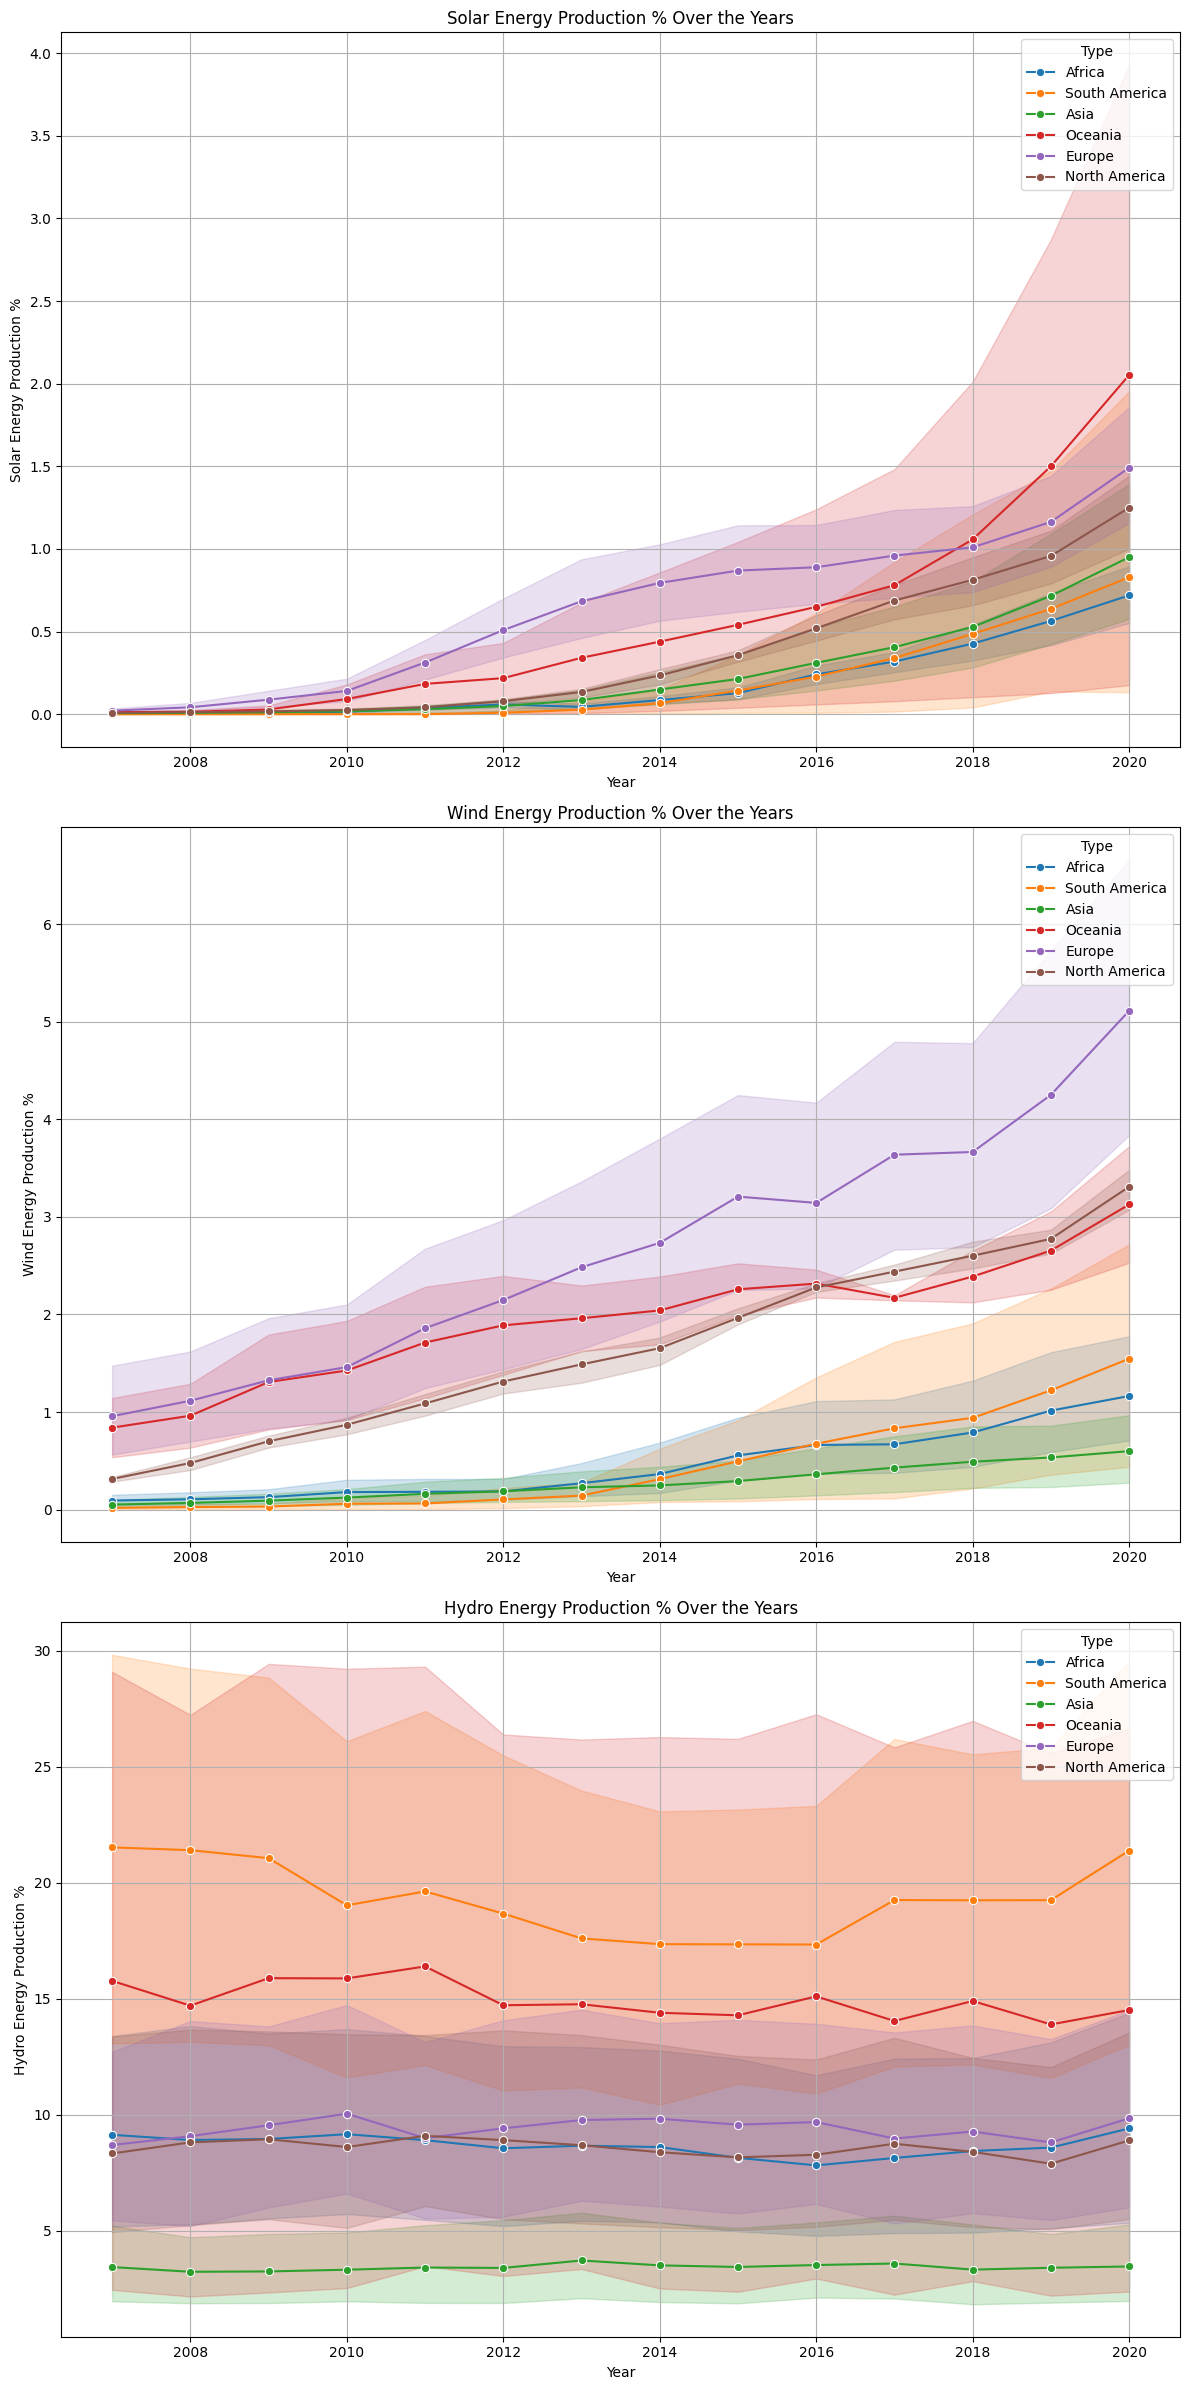

In [108]:
dummy_df_solar = df_indivijual_energy_electricity[['Entity', 'Year','Solar Energy(%)', 'Solar Electricity(%)']].copy()
dummy_df_solar['Major_Region'] = dummy_df_solar['Entity'].apply(lambda x: [k for k, v in major_region_mapping.items() if x in v][0] if any(x in v for v in major_region_mapping.values()) else 'Unknown')
dummy_df_solar.drop(columns=['Entity'], inplace=True)
dummy_df_solar = drop_null_year(dummy_df_solar, (22, -1))
dummy_df_solar = dummy_df_solar[dummy_df_solar['Major_Region'] != 'Unknown']

# Prepare data for Wind Energy plot
dummy_df_wind = df_indivijual_energy_electricity[['Entity', 'Year','Wind Energy(%)', 'Wind Electricity(%)']].copy()
dummy_df_wind['Major_Region'] = dummy_df_wind['Entity'].apply(lambda x: [k for k, v in major_region_mapping.items() if x in v][0] if any(x in v for v in major_region_mapping.values()) else 'Unknown')
dummy_df_wind.drop(columns=['Entity'], inplace=True)
dummy_df_wind = drop_null_year(dummy_df_wind, (22, -1))
dummy_df_wind = dummy_df_wind[dummy_df_wind['Major_Region'] != 'Unknown']

# Prepare data for Hydro Energy plot
dummy_df_hydro = df_indivijual_energy_electricity[['Entity', 'Year','Hydro Energy(%)', 'Hydro Electricity(%)']].copy()
dummy_df_hydro['Major_Region'] = dummy_df_hydro['Entity'].apply(lambda x: [k for k, v in major_region_mapping.items() if x in v][0] if any(x in v for v in major_region_mapping.values()) else 'Unknown')
dummy_df_hydro.drop(columns=['Entity'], inplace=True)
dummy_df_hydro = drop_null_year(dummy_df_hydro, (22, -1))
dummy_df_hydro = dummy_df_hydro[dummy_df_hydro['Major_Region'] != 'Unknown']

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 24))

# Plot for Solar Energy Production % Over the Years
sns.lineplot(data=dummy_df_solar, x='Year', y='Solar Energy(%)', hue='Major_Region', marker='o', ax=axes[0])
axes[0].set_title('Solar Energy Production % Over the Years')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Solar Energy Production %')
axes[0].legend(title='Type')
axes[0].grid(True)

# Plot for Wind Energy Production % Over the Years
sns.lineplot(data=dummy_df_wind, x='Year', y='Wind Energy(%)', hue='Major_Region', marker='o', ax=axes[1])
axes[1].set_title('Wind Energy Production % Over the Years')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Wind Energy Production %')
axes[1].legend(title='Type')
axes[1].grid(True)

# Plot for Hydro Energy Production % Over the Years
sns.lineplot(data=dummy_df_hydro, x='Year', y='Hydro Energy(%)', hue='Major_Region', marker='o', ax=axes[2])
axes[2].set_title('Hydro Energy Production % Over the Years')
axes[2].set_xlabel('Year')
axes[2].set_ylabel('Hydro Energy Production %')
axes[2].legend(title='Type')
axes[2].grid(True)

plt.tight_layout()
plt.show()

    in first graph oceane has the highest growth in solar energy production.

    in second graph europe has the highest growth in wind energy production.

    in third graph southaffrica has the highest hydro energy production.

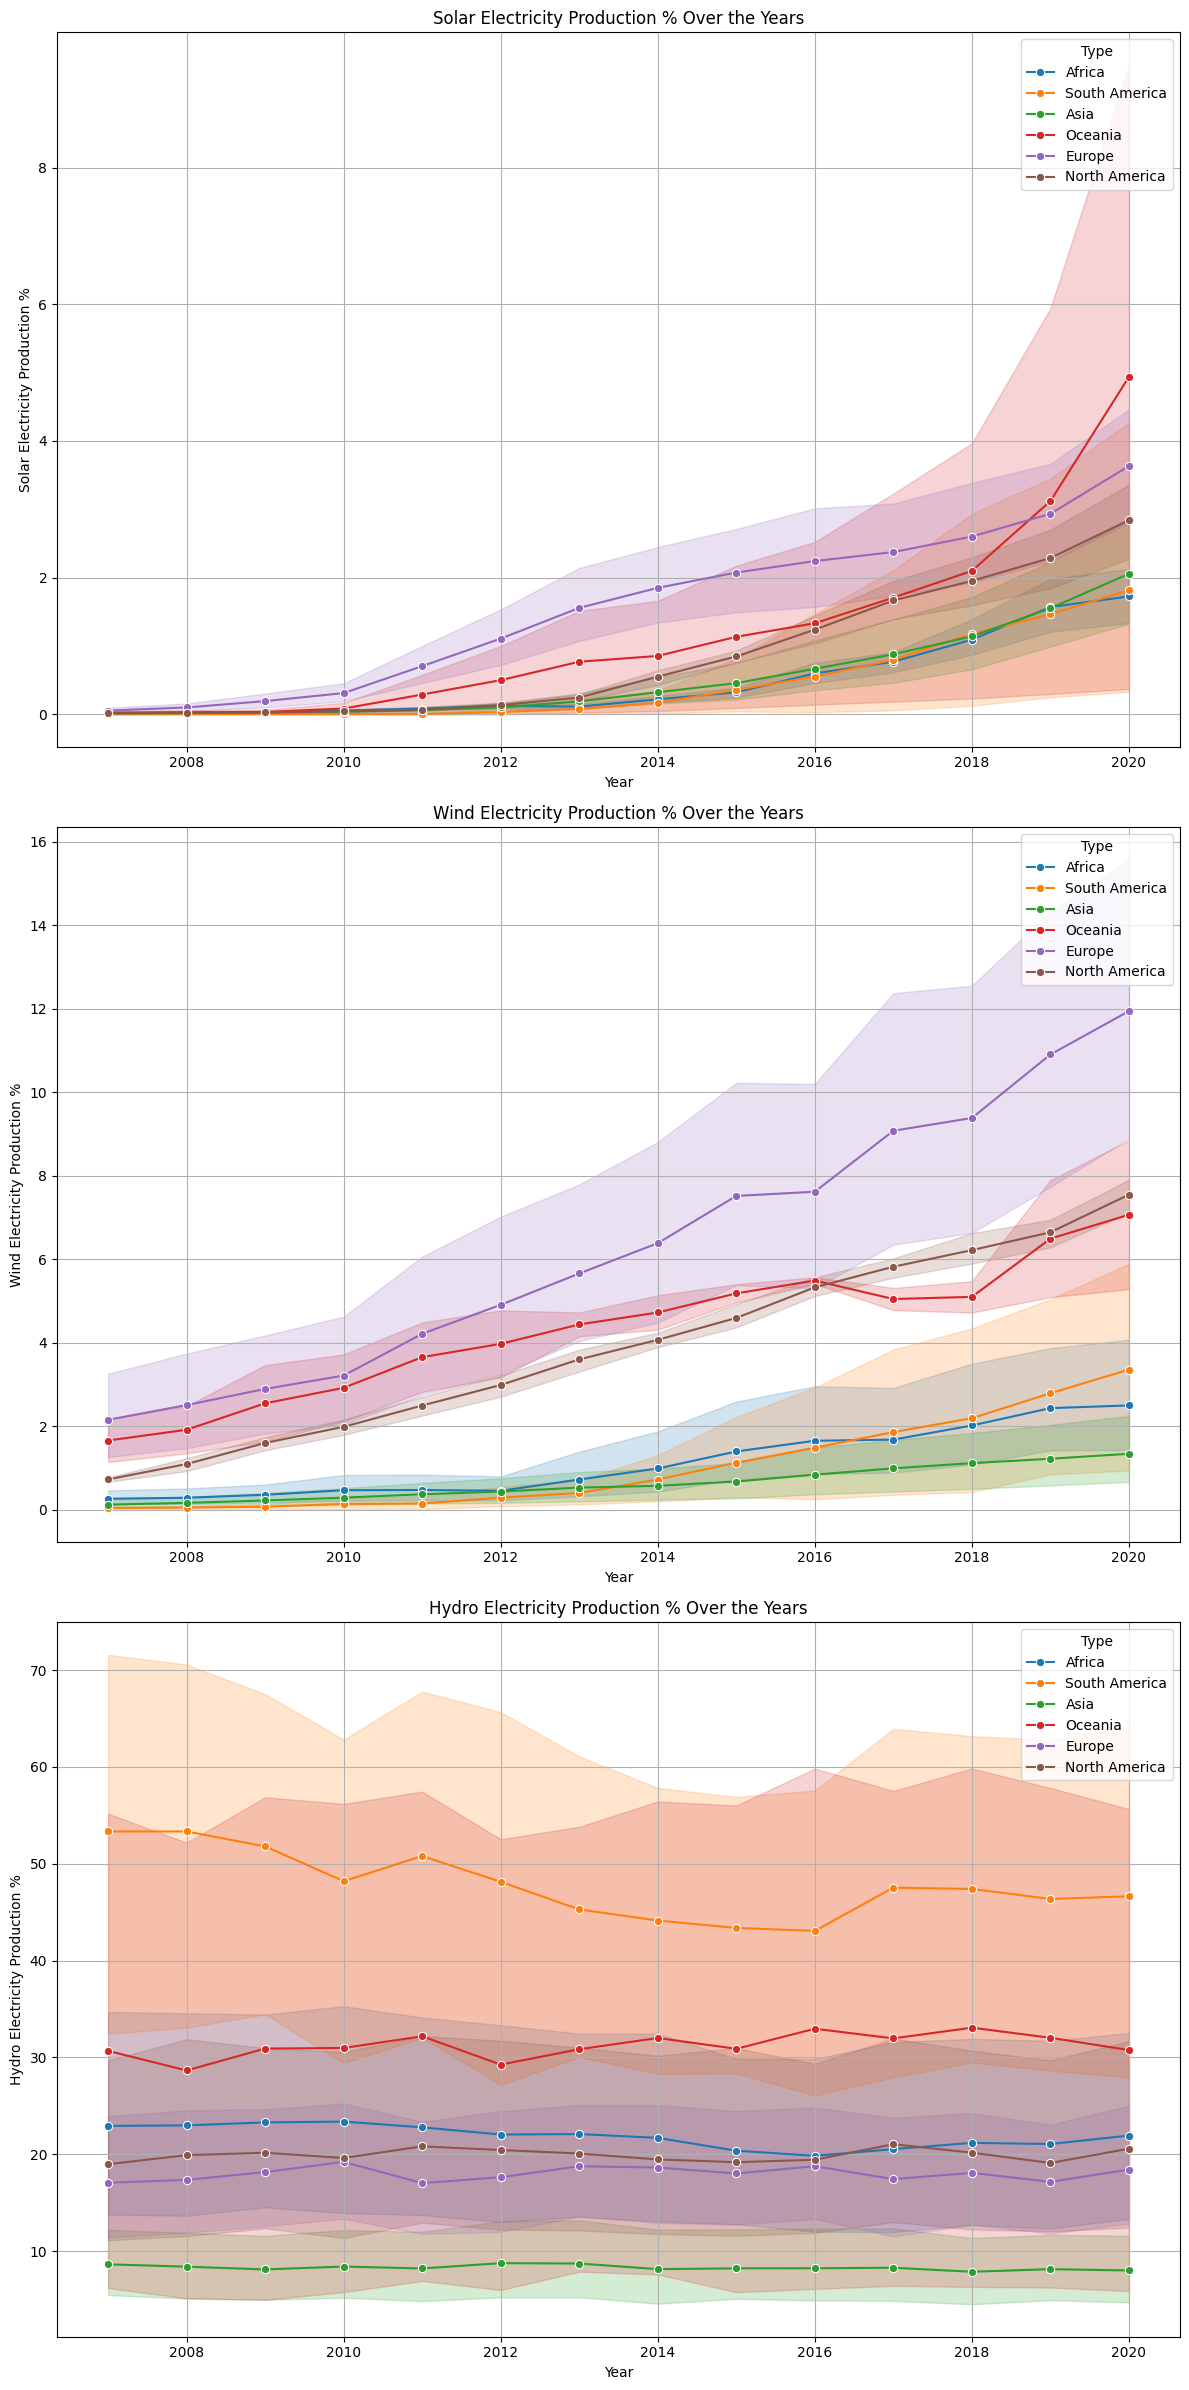

In [109]:
dummy_df_solar = df_indivijual_energy_electricity[['Entity', 'Year','Solar Energy(%)', 'Solar Electricity(%)']].copy()
dummy_df_solar['Major_Region'] = dummy_df_solar['Entity'].apply(lambda x: [k for k, v in major_region_mapping.items() if x in v][0] if any(x in v for v in major_region_mapping.values()) else 'Unknown')
dummy_df_solar.drop(columns=['Entity'], inplace=True)
dummy_df_solar = drop_null_year(dummy_df_solar, (22, -1))
dummy_df_solar = dummy_df_solar[dummy_df_solar['Major_Region'] != 'Unknown']

# Prepare data for Wind Energy plot
dummy_df_wind = df_indivijual_energy_electricity[['Entity', 'Year','Wind Energy(%)', 'Wind Electricity(%)']].copy()
dummy_df_wind['Major_Region'] = dummy_df_wind['Entity'].apply(lambda x: [k for k, v in major_region_mapping.items() if x in v][0] if any(x in v for v in major_region_mapping.values()) else 'Unknown')
dummy_df_wind.drop(columns=['Entity'], inplace=True)
dummy_df_wind = drop_null_year(dummy_df_wind, (22, -1))
dummy_df_wind = dummy_df_wind[dummy_df_wind['Major_Region'] != 'Unknown']

# Prepare data for Hydro Energy plot
dummy_df_hydro = df_indivijual_energy_electricity[['Entity', 'Year','Hydro Energy(%)', 'Hydro Electricity(%)']].copy()
dummy_df_hydro['Major_Region'] = dummy_df_hydro['Entity'].apply(lambda x: [k for k, v in major_region_mapping.items() if x in v][0] if any(x in v for v in major_region_mapping.values()) else 'Unknown')
dummy_df_hydro.drop(columns=['Entity'], inplace=True)
dummy_df_hydro = drop_null_year(dummy_df_hydro, (22, -1))
dummy_df_hydro = dummy_df_hydro[dummy_df_hydro['Major_Region'] != 'Unknown']

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 24))

# Plot for Solar Energy Production % Over the Years
sns.lineplot(data=dummy_df_solar, x='Year', y='Solar Electricity(%)', hue='Major_Region', marker='o', ax=axes[0])
axes[0].set_title('Solar Electricity Production % Over the Years')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Solar Electricity Production %')
axes[0].legend(title='Type')
axes[0].grid(True)

# Plot for Wind Energy Production % Over the Years
sns.lineplot(data=dummy_df_wind, x='Year', y='Wind Electricity(%)', hue='Major_Region', marker='o', ax=axes[1])
axes[1].set_title('Wind Electricity Production % Over the Years')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Wind Electricity Production %')
axes[1].legend(title='Type')
axes[1].grid(True)

# Plot for Hydro Energy Production % Over the Years
sns.lineplot(data=dummy_df_hydro, x='Year', y='Hydro Electricity(%)', hue='Major_Region', marker='o', ax=axes[2])
axes[2].set_title('Hydro Electricity Production % Over the Years')
axes[2].set_xlabel('Year')
axes[2].set_ylabel('Hydro Electricity Production %')
axes[2].legend(title='Type')
axes[2].grid(True)

plt.tight_layout()
plt.show()

    in first graph oceane has the highest growth in solar electricity production.

    in second graph europe has the highest growth in wind electricity production.

    in third graph southaffrica has the highest hydro electricty production.

**Feature selection**

    the csv files we are working on: 
        for problem statemnt 1, (1 and 4)
        for problem statemnt 2, (2 and 3)
        for problem statemnt 3,  (6,7,10,11,14,15)
    combining the eda results:
        1) south america is the king of hydro energy production (based on third problem statement graphs), 
        from second problem statemnt we know that hydro market share is the highest
        these 2 togeter show why south africa is the top overall.
        though south america is not growing.
        2) europe has the highest growth in renwable energy (based on first problem statemnt graph),
        europe is the king of wind energy and is a good competetor of solar,
        this is further justified as we see that wind energy is the highest growing renewable energy (shown in second problem statement)
        as we proved that wind energy was the highest growing renewable energy since 2010.
        


Answering the problem statements:

    Identifying the Country with the Highest Renewable Energy Production:
        south america is the contry with the highest renewable energy production (specificaly in hydro)
        while europe is the top growing regions for renewable energy (specificaly wind)
        ociana has the highest solar while second in wind.

    Analyzing the Proportion of Renewable Energy in Each Country Over Time:
        south america major energys ourse is hydro while there is no growth.
        europe has a mixture of solar and wind.
        ociana is the top in solar energy, and is one of the top in hydro and wind.
        africa, asia and south america has a mix of hydro, wind and solar.

    Determining the Most Produced/Consumed Renewable Energy Source by Year and country:
        the most produced and consumed renewable energy has and remained to be hydro.

In [110]:
df_share_renewable.to_csv('df_share_renewable.csv')
df_mordern_renewable.to_csv('df_mordern_renewable.csv')
df_indivijual_energy_electricity.to_csv('df_indivijual_energy_electricity.csv')